# TITANIC: Wrangling the Passenger Manifest

## Advanced Exploratory Analysis with Pandas

This tutorial is based on the Titanic Wrangling notebook covered in class. This notebook goes more in-depth than the basic EDA and Wrangling we performed in class. The objective is to explore the data more and think about various ways to impute data. We work through these steps because scikit-learn will expect numeric values and no blanks.

Refer to the references provided in the wrangling notebook, and try some of the exercises below.

(References:
http://www.analyticsvidhya.com/blog/2014/08/baby-steps-python-performing-exploratory-analysis-python/    
http://www.analyticsvidhya.com/blog/2014/09/data-munging-python-using-pandas-baby-steps-python/)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
pd.set_option('display.max_columns', 500)

## Aquire the Data

Use pandas to open the training csv from the data folder.

In [3]:
# open the csv
df = pd.read_csv("../titanic/data/train.csv") 

## Exploratory Data Analysis

#### 1. Describe the Data

In [4]:
# view the head of the file
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
# Use pandas to run summary statistics on the data.
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


**What does describe tell you?**

Use the information from describe to provide a summary of the data.
* Are there missing values?
* What is the age distribution?
* What is the mean age?
* What percentage of passengers survived?
* How many passengers traveled in class 3?
* Does the data have outliers?

##### Notes on the data from describe:
Age is missing 177 values

The distribution of age ranges from .42 to 80 years

The mean age is 29.7

~38% of passengers survived

50% of the passengers were in class 3

Fare appears to contain outliers

In [6]:
# what are the dtypes of the columns
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [7]:
# what does the ticket data look like? check how many unique values there are.
df.Ticket.value_counts()

CA. 2343            7
1601                7
347082              7
3101295             6
347088              6
CA 2144             6
S.O.C. 14879        5
382652              5
113760              4
347077              4
2666                4
349909              4
W./C. 6608          4
LINE                4
PC 17757            4
17421               4
113781              4
4133                4
19950               4
371110              3
24160               3
C.A. 34651          3
PC 17572            3
C.A. 31921          3
110413              3
345773              3
347742              3
13502               3
248727              3
110152              3
                   ..
A/5 2466            1
2620                1
113767              1
350025              1
11755               1
STON/O2. 3101283    1
244270              1
347089              1
349244              1
349221              1
342826              1
350406              1
350042              1
315088              1
113773    

In [8]:
# look at Fares since the describe suggests outliers
print(df.Fare.min())
print(df.Fare.max())
print(df.Fare.median())
print(df.Fare.mean())
print('\n')
print(df.Fare.value_counts())

0.0
512.3292
14.4542
32.2042079685746


8.0500      43
13.0000     42
7.8958      38
7.7500      34
26.0000     31
10.5000     24
7.9250      18
7.7750      16
26.5500     15
7.2292      15
0.0000      15
7.2500      13
7.8542      13
8.6625      13
7.2250      12
9.5000       9
16.1000      9
24.1500      8
15.5000      8
56.4958      7
14.5000      7
7.0500       7
52.0000      7
31.2750      7
69.5500      7
14.4542      7
7.7958       6
26.2500      6
30.0000      6
27.9000      6
            ..
211.5000     1
12.2750      1
8.6542       1
6.9500       1
22.0250      1
7.1417       1
10.1708      1
17.4000      1
8.3000       1
16.0000      1
10.5167      1
15.0458      1
50.4958      1
8.4042       1
26.2833      1
12.6500      1
8.7125       1
22.5250      1
15.7500      1
9.2167       1
21.6792      1
14.1083      1
15.1000      1
7.3125       1
8.1125       1
13.8583      1
34.6542      1
12.0000      1
32.3208      1
28.5000      1
Name: Fare, dtype: int64


In [9]:
# Cabin has null values. check the values
print(sum(df['Cabin'].isnull()) )
print('\n')
print(df.Cabin.value_counts())

687


G6                 4
B96 B98            4
C23 C25 C27        4
C22 C26            3
F2                 3
F33                3
D                  3
E101               3
C52                2
C125               2
C124               2
B28                2
C126               2
B35                2
B18                2
C2                 2
F G73              2
D35                2
B22                2
C123               2
C92                2
B58 B60            2
F4                 2
D26                2
B5                 2
B57 B59 B63 B66    2
E33                2
E24                2
C83                2
D17                2
                  ..
E38                1
A26                1
B50                1
E34                1
C54                1
D30                1
F38                1
A14                1
C46                1
E40                1
C62 C64            1
D21                1
A23                1
C82                1
A36                1
C47                1
B42    

#### 2. Visualize the Data

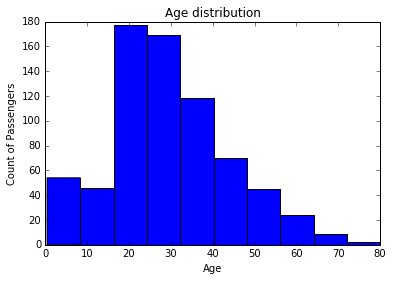

In [10]:
# Visualize the age distribution
fig = plt.figure()
ax = fig.add_subplot(111)
ax.hist(df['Age'], bins = 10, range = (df['Age'].min(),df['Age'].max()))
plt.title('Age distribution')
plt.xlabel('Age')
plt.ylabel('Count of Passengers')
plt.show()
plt.savefig('age_dist.png')

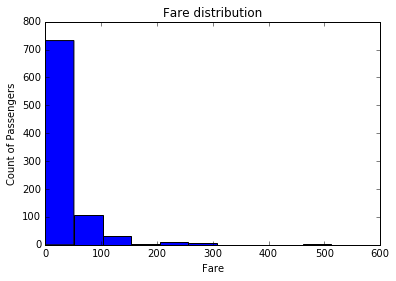

In [11]:
# Visualize the fare distribution
fig = plt.figure()
ax = fig.add_subplot(111)
ax.hist(df['Fare'], bins = 10, range = (df['Fare'].min(),df['Fare'].max()))
plt.title('Fare distribution')
plt.xlabel('Fare')
plt.ylabel('Count of Passengers')
plt.show()

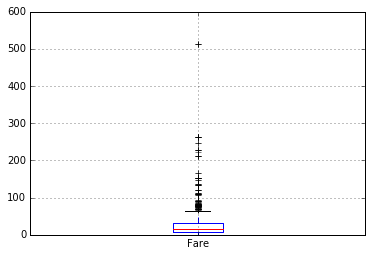

In [12]:
# look at fares using a boxplot since the describe data suggested outlier(s)
df.boxplot(column='Fare', return_type='axes')

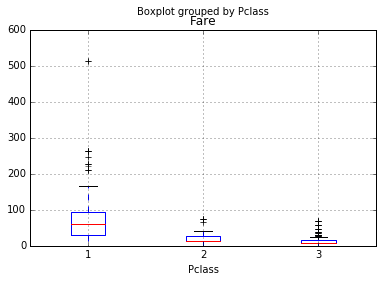

In [13]:
# examine the fares by Pclass with boxplot
df.boxplot(column='Fare', by = 'Pclass')
plt.savefig('fare_class.png')

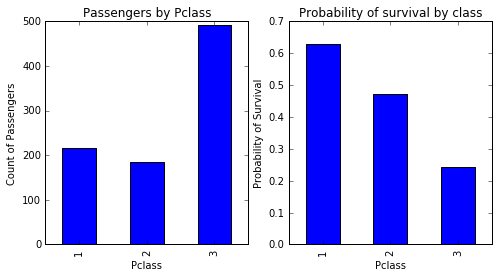

In [14]:
# look at the distribution of passengers by class and their survival probability

# create groupby dataframes that:
# plots the distribution of passengres by class
# shows the probability of survival by class
temp1 = df.groupby('Pclass').Survived.count()
temp2 = df.groupby('Pclass').Survived.sum()/df.groupby('Pclass').Survived.count()

#plot the data
fig = plt.figure(figsize=(8,4))
ax1 = fig.add_subplot(121)
ax1.set_xlabel('Pclass')
ax1.set_ylabel('Count of Passengers')
ax1.set_title("Passengers by Pclass")
temp1.plot(kind='bar')

ax2 = fig.add_subplot(122)
temp2.plot(kind = 'bar')
ax2.set_xlabel('Pclass')
ax2.set_ylabel('Probability of Survival')
ax2.set_title("Probability of survival by class")

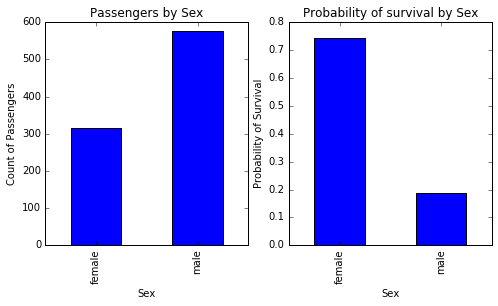

In [15]:
# look at the distribution of passengers by sex and their survival probability

# create groupby dataframes that:
# plots the distribution of passengres by sex
# shows the probability of survival by sex
temp3 = df.groupby('Sex').Survived.count()
temp4 = df.groupby('Sex').Survived.sum()/df.groupby('Sex').Survived.count()

#plot the data
fig = plt.figure(figsize=(8,4))
ax1 = fig.add_subplot(121)
ax1.set_xlabel('Sex')
ax1.set_ylabel('Count of Passengers')
ax1.set_title("Passengers by Sex")
temp3.plot(kind='bar')

ax2 = fig.add_subplot(122)
temp4.plot(kind = 'bar')
ax2.set_xlabel('Sex')
ax2.set_ylabel('Probability of Survival')
ax2.set_title("Probability of survival by Sex")

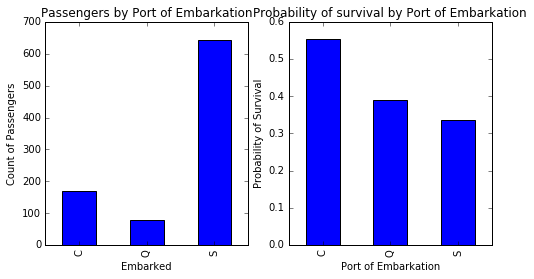

In [16]:
# look at the distribution of passengers by Port of Embarkation and their survival probability

# create groupby dataframes that:
# plots the distribution of passengres by Port of Embarkation
# shows the probability of survival by Port of Embarkation
temp5 = df.groupby('Embarked').Survived.count()
temp6 = df.groupby('Embarked').Survived.sum()/df.groupby('Embarked').Survived.count()

#plot the data
fig = plt.figure(figsize=(8,4))
ax1 = fig.add_subplot(121)
ax1.set_xlabel('Port of Embarkation')
ax1.set_ylabel('Count of Passengers')
ax1.set_title("Passengers by Port of Embarkation")
temp5.plot(kind='bar')

ax2 = fig.add_subplot(122)
temp6.plot(kind = 'bar')
ax2.set_xlabel('Port of Embarkation')
ax2.set_ylabel('Probability of Survival')
ax2.set_title("Probability of survival by Port of Embarkation")
plt.savefig('port_prob.png')

## Data Wrangling

We need to review the data and decide how to handle missing data. In some cases we may want to impute our missing values. In other cases we may want to drop the data. Explore the data and explain your decisions on imputing or dropping data.

In [17]:
# check for null values
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [18]:
# make a decision on what to do with the cabin data. explain your decision.
# drop Cabin since there are so many null values and no way to impute them.
df.drop('Cabin', axis= 1, inplace=True)

In [19]:
# make a decision on what to do with the ticket data. explain your decision.
# Ticket did not have missing values, but does not seem to have valuable information
df.drop('Ticket', axis= 1, inplace=True)

**Age is likely to be an important factor in modeling. Is there another way to impute the data aside from using the mean of the column?**

In [20]:
#  What is mean age by sex?
df.groupby('Sex').Age.mean()

Sex
female    27.915709
male      30.726645
Name: Age, dtype: float64

In [21]:
# What is mean age by Pclass?
df.groupby('Pclass').Age.mean()

Pclass
1    38.233441
2    29.877630
3    25.140620
Name: Age, dtype: float64

In [22]:
# What about mean age by sex and pclass?
df.groupby(['Sex','Pclass']).Age.mean()

Sex     Pclass
female  1         34.611765
        2         28.722973
        3         21.750000
male    1         41.281386
        2         30.740707
        3         26.507589
Name: Age, dtype: float64

In [23]:
# and mean age by sex and pclass if they survived?
df.groupby(['Sex','Pclass', 'Survived']).Age.mean()

Sex     Pclass  Survived
female  1       0           25.666667
                1           34.939024
        2       0           36.000000
                1           28.080882
        3       0           23.818182
                1           19.329787
male    1       0           44.581967
                1           36.248000
        2       0           33.369048
                1           16.022000
        3       0           27.255814
                1           22.274211
Name: Age, dtype: float64

As you can see, mean age can vary widely if you consider a passenger's sex, class, and survival. 

Can you use this information to impute NaN values based on these factors instead of just using the mean for the entire column?

In [24]:
# use the groupby results as a lookup table to impute missing values
df_lookup = df.groupby(['Sex','Pclass', 'Survived']).Age.mean().reset_index()
df_lookup

,Sex,Pclass,Survived,Age
0,female,1,0,25.666667
1,female,1,1,34.939024
2,female,2,0,36.000000
3,female,2,1,28.080882
4,female,3,0,23.818182
5,female,3,1,19.329787
6,male,1,0,44.581967
7,male,1,1,36.248000
8,male,2,0,33.369048
9,male,2,1,16.022000


In [25]:
# iterate through the dataframe. when the age is NaN, lookup the age to fill in from the lookup table
# this imputes the age with the median age of passengers with similar characteristics (sex, pclass, survival)
# instead of simply replacing it with the median age of all passengers

def get_median_age (Sex, Pclass, Survived):
    return df_lookup.loc[(df_lookup.Sex == Sex) & (df_lookup.Pclass == Pclass) & (df_lookup.Survived == Survived)].Age
    
for idx in df.index:
    if np.isnan(df.loc[idx].Age):
        med_age = get_median_age(df.loc[idx].Sex, df.loc[idx].Pclass, df.loc[idx].Survived)
        #print med_age
        df.set_value(idx, 'Age', med_age)

**As noted during the visualization, there is outlier data in fares.**

Should we do anything about this data? It is possible the fare was actually above $500. It is also possible there was an error in transcrbing the data. 

Explore the fare information and make a decision on what, if anything, to do with the outlier data. Explain your decision. 

In [26]:
''' The fare of 512 for Class 1 looks like a likely error. 
Replace the value by the second highest value, which is closer to other data points.
'''

# change the outlier fare to the max fare below this amount (263)
for idx in df.index:
    if df.loc[idx].Fare > 500:
        df.set_value(idx, 'Fare', 263.0000)
        
df.sort_values(by='Fare', ascending=False).head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,263.0000,C
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,263.0000,S
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,263.0000,S
341,342,1,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,263.0000,S
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,263.0000,C
438,439,0,1,"Fortune, Mr. Mark",male,64.0,1,4,263.0000,S
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,263.0000,C
311,312,1,1,"Ryerson, Miss. Emily Borie",female,18.0,2,2,262.3750,C
742,743,1,1,"Ryerson, Miss. Susan Parker ""Suzette""",female,21.0,2,2,262.3750,C
118,119,0,1,"Baxter, Mr. Quigg Edmond",male,24.0,0,1,247.5208,C


**What about passengers with a fare of $0?**

In [27]:
# what about where fares were 0?
df.loc[df.Fare == 0]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
179,180,0,3,"Leonard, Mr. Lionel",male,36.000000,0,0,0.0,S
263,264,0,1,"Harrison, Mr. William",male,40.000000,0,0,0.0,S
271,272,1,3,"Tornquist, Mr. William Henry",male,25.000000,0,0,0.0,S
277,278,0,2,"Parkes, Mr. Francis ""Frank""",male,33.369048,0,0,0.0,S
302,303,0,3,"Johnson, Mr. William Cahoone Jr",male,19.000000,0,0,0.0,S
413,414,0,2,"Cunningham, Mr. Alfred Fleming",male,33.369048,0,0,0.0,S
466,467,0,2,"Campbell, Mr. William",male,33.369048,0,0,0.0,S
481,482,0,2,"Frost, Mr. Anthony Wood ""Archie""",male,33.369048,0,0,0.0,S
597,598,0,3,"Johnson, Mr. Alfred",male,49.000000,0,0,0.0,S
633,634,0,1,"Parr, Mr. William Henry Marsh",male,44.581967,0,0,0.0,S


In [28]:
# what is the median fare for each class?
df.groupby('Pclass').Fare.mean()

Pclass
1    80.691782
2    20.662183
3    13.675550
Name: Fare, dtype: float64

In [29]:
#replace 0 values with the mean of the class
df_Pclass_lookup = df.groupby('Pclass').Fare.mean().reset_index()
df_Pclass_lookup

,Pclass,Fare
0,1,80.691782
1,2,20.662183
2,3,13.675550


In [30]:
# this imputes the fare with the median fare for that class instead of simply replacing it with the 
# median of all fares
def get_median_fare (Pclass):
    return df_Pclass_lookup.loc[(df_Pclass_lookup.Pclass == Pclass)].Fare
    
for idx in df.index:
    if df.loc[idx].Fare == 0:
        med_fare = get_median_fare(df.loc[idx].Pclass)
        df.set_value(idx, 'Fare', med_fare)


**What should we do about missing embarkation data?**

In [31]:
# look at the missing embarkation data
df.loc[df.Embarked.isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,80.0,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,80.0,NaN


In [32]:
# is there any realtionship between fare and the embarkation location?
df.loc[df.Fare == 80]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,80.0,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,80.0,NaN


In [33]:
# is there any realtionship between the embarkation location and class/sex/survival of a passenger?
df.loc[(df.Survived == 1) & (df.Pclass == 1) & (df.Sex == 'female')].Embarked.value_counts()

S    46
C    42
Q     1
Name: Embarked, dtype: int64

In [34]:
# how about PassengerID and embarkation location? could they be in order?
df.loc[df.PassengerId.isin(range(50,70))]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
49,50,0,3,"Arnold-Franchi, Mrs. Josef (Josefine Franchi)",female,18.000000,1,0,17.8000,S
50,51,0,3,"Panula, Master. Juha Niilo",male,7.000000,4,1,39.6875,S
51,52,0,3,"Nosworthy, Mr. Richard Cater",male,21.000000,0,0,7.8000,S
52,53,1,1,"Harper, Mrs. Henry Sleeper (Myna Haxtun)",female,49.000000,1,0,76.7292,C
53,54,1,2,"Faunthorpe, Mrs. Lizzie (Elizabeth Anne Wilkin...",female,29.000000,1,0,26.0000,S
54,55,0,1,"Ostby, Mr. Engelhart Cornelius",male,65.000000,0,1,61.9792,C
55,56,1,1,"Woolner, Mr. Hugh",male,36.248000,0,0,35.5000,S
56,57,1,2,"Rugg, Miss. Emily",female,21.000000,0,0,10.5000,S
57,58,0,3,"Novel, Mr. Mansouer",male,28.500000,0,0,7.2292,C
58,59,1,2,"West, Miss. Constance Mirium",female,5.000000,1,2,27.7500,S


In [35]:
# there does not seem to be a good way to impute missing embarkation data. drop those two rows and create final df
df = df[df.Embarked.notnull()]

**Sex and Embarkation**
As noted in the objectives, we will need to change text values to numeric values for scikit-learn. There are different ways to do this. In order to practice, we will use 'map' and 'get_dummies' here. In the machine learning class we will discuss when you may or may not want to use these as well as the options scikit-learn gives us for converting this data.

Convert Sex to numeric values using the python 'map' function to change the values to binary values. 

Use pandas 'get_dummies' to change the Embarkation data to dummy variables. 

In [36]:
# map sex into numeric binaries
df.Sex = df.Sex.map({'male': 0,'female': 1})
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,8.0500,S


In [37]:
# create dummy varaibles for Embarked, join them to the munged df, then drop the Embarked column
dummies_emb = pd.get_dummies(df.Embarked, prefix='Embarked')
dummies_emb.head()

,Embarked_C,Embarked_Q,Embarked_S
0,0.0,0.0,1.0
1,1.0,0.0,0.0
2,0.0,0.0,1.0
3,0.0,0.0,1.0
4,0.0,0.0,1.0


In [38]:
df = df.join(dummies_emb)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,7.2500,S,0.0,0.0,1.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,71.2833,C,1.0,0.0,0.0
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,7.9250,S,0.0,0.0,1.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,53.1000,S,0.0,0.0,1.0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,8.0500,S,0.0,0.0,1.0


In [39]:
df.drop('Embarked', axis=1, inplace=True)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,7.2500,0.0,0.0,1.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,71.2833,1.0,0.0,0.0
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,7.9250,0.0,0.0,1.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,53.1000,0.0,0.0,1.0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,8.0500,0.0,0.0,1.0


Optional: save the new dataframe to your titanic database or to a csv file.

In [40]:
import pandas.io.sql as pd_sql
import sqlite3 as sql

In [ ]:
con = sql.connect("titanic.db")
pd_sql.to_sql(df, "updated_training_data", con) 

In [ ]:
df.to_csv("../titanic/data/my_wrangled_train.csv") 